In [1]:
import pandas as pd
import os
from fastai.vision.all import *

C:\Users\bowan\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [ ]:
Dataframe_path = '../image_data_assorted.csv'

if os.path.exists(Dataframe_path):
    print("The file exists.")
else:
    %run ../Generating_basic_data.ipynb

In [2]:

df = pd.read_csv('../image_data_assorted.csv')

In [3]:
df.head()

,Radius,X_Position,Y_Position,Area,Surface2d,Volume,image_path,mask_path,shape
0,26,216,360,2123,82,73585,../images_assorted/image_1.png,../masks_assorted/mask_1.png,circle
1,56,285,248,3136,224,175616,../images_assorted/image_2.png,../masks_assorted/mask_2.png,square
2,16,69,205,256,64,4096,../images_assorted/image_3.png,../masks_assorted/mask_3.png,square
3,105,336,270,34618,330,4846590,../images_assorted/image_4.png,../masks_assorted/mask_4.png,circle
4,99,182,295,4900,338,970299,../images_assorted/image_5.png,../masks_assorted/mask_5.png,triange


In [4]:
def get_inputs(row):
    # Convert image path to PILImage
    image_data = PILImage.create(row['image_path'])
    return image_data 

def get_target(row):
    # Convert image path to PILImage
    target_data = row['mask_path']
    return target_data

In [5]:
codes = ['blank','background', 'object'] # remember 0 is first entry so pixels 1, 2 ,3 etc need a dummy entry for 0

dblock = DataBlock(
    blocks=(ImageBlock, MaskBlock(codes=codes)),  # Image input and auxiliary input
    get_x=get_inputs,  # Get both the image path and the auxiliary input
    get_y=get_target,  # Get the radius value from the dataframe
    #splitter=RandomSplitter(valid_pct=0.2, seed=42),  # Split into train and validation sets
    #item_tfms=Resize(512)  # Resize images to 512x512

)

In [6]:
dls = dblock.dataloaders(df, bs=4)


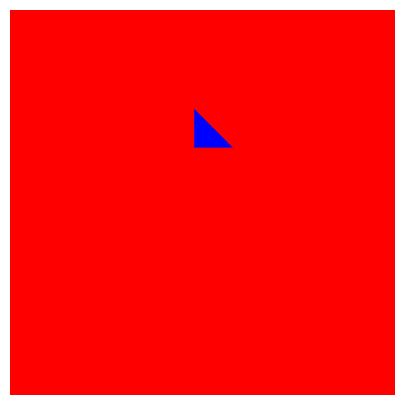

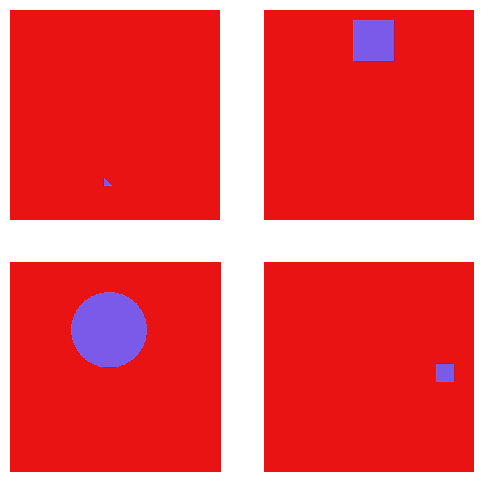

In [7]:

image_paths = df['image_path']
image_data = PILImage.create(image_paths[4])
image_data.show()

#print('filtered batched data below')

dls.show_batch()

In [8]:
# Create and train the learner
learn = unet_learner(dls, resnet34, metrics=Dice)


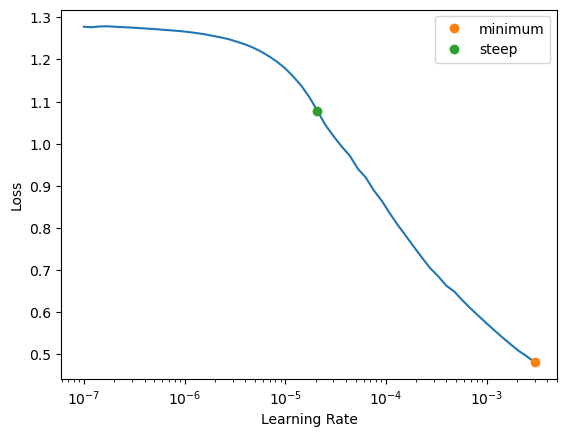

In [9]:
lr_min,lr_steep = learn.lr_find(suggest_funcs=(minimum, steep))

In [10]:
learn.fine_tune(10, base_lr=lr_steep)

epoch,train_loss,valid_loss,dice,time
0,0.047118,0.002602,1.060205,00:48


epoch,train_loss,valid_loss,dice,time
0,0.001414,0.001123,1.060621,00:47
1,0.000532,0.000516,1.060684,00:48
2,0.000282,0.000318,1.060783,00:47
3,0.000171,0.000210,1.060786,00:47
4,0.000120,0.000127,1.060780,00:47



KeyboardInterrupt



<bound method Recorder.plot_loss of Recorder>


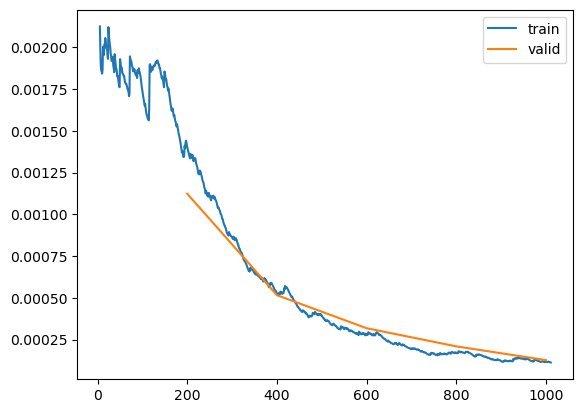

In [11]:
# Plot the losses
learn.recorder.plot_loss()
print(learn.recorder.plot_loss)
# Set the y-axis limits (replace with your desired limits)
#plt.ylim(0, 5)  # sets y-axis limits 
# Show the plot with updated y-limits
plt.show()

In [12]:


learn.export('exported_segmentation_model.pkl')
 


In [13]:
# import

learn2 = load_learner('exported_segmentation_model.pkl')   # using learner2 to show its loading


<class 'fastai.torch_core.TensorMask'>
<class 'fastai.torch_core.TensorBase'>
<class 'fastai.torch_core.TensorBase'>
torch.Size([512, 512])
torch.Size([512, 512])
torch.Size([3, 512, 512])


<Axes: >

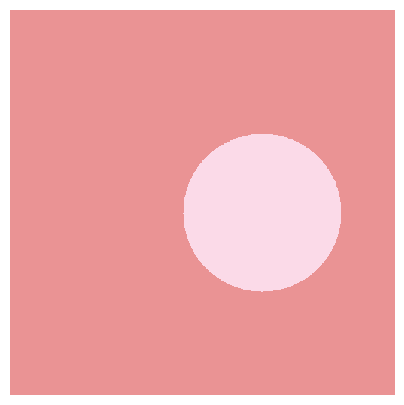

In [31]:
# just getting a random image from df
image_paths = df['image_path']
image_data = PILImage.create(image_paths[3])
prediction, classid, probablities = learn2.predict(image_data)

print(type(prediction))
print(type(classid))
print(type(probablities))

print(prediction.shape)
print(classid.shape)
print(probablities.shape)

prediction.show()
#print(prediction.shape)
#print(type(prediction))

<Axes: >

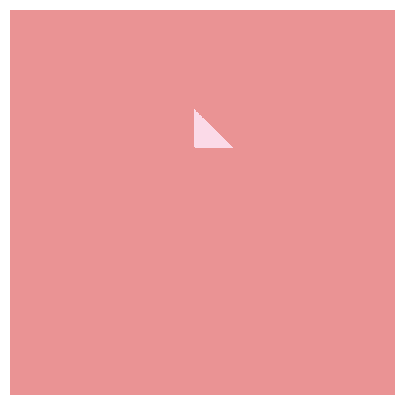

In [15]:
prediction.show()

In [38]:
probablities[0]

TensorBase([[1.2812e-02, 3.9902e-03, 7.4488e-03,  ..., 2.5706e-03,
             1.3397e-03, 6.2161e-03],
            [1.2152e-02, 1.9111e-03, 1.8915e-03,  ..., 1.5113e-03,
             3.5214e-04, 1.3500e-03],
            [2.9141e-03, 5.3543e-04, 3.4961e-04,  ..., 4.2192e-05,
             2.7682e-04, 4.6053e-04],
            ...,
            [1.1618e-02, 1.5462e-03, 1.1648e-04,  ..., 4.6206e-04,
             1.8806e-03, 1.0124e-03],
            [1.5968e-02, 8.2671e-03, 1.4672e-04,  ..., 2.5103e-03,
             1.0484e-02, 1.0381e-02],
            [2.2267e-02, 1.3349e-02, 5.4699e-04,  ..., 4.6690e-03,
             1.6620e-02, 2.9692e-02]])

<Axes: >

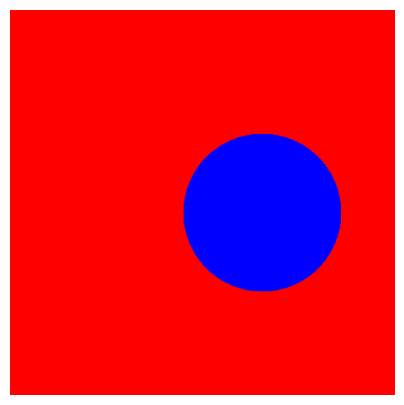

In [32]:
image_data.show()

In [40]:
prediction[255]

TensorMask([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
            1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
            1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
            1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
            1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
            1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
            1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
            1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
            1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
            1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
            1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
            2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
            2, 2, 2, 2, 2, 2

In [42]:
probablities[1][255]

TensorBase([9.9944e-01, 9.9988e-01, 9.9999e-01, 1.0000e+00, 1.0000e+00,
            1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
            1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
            1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
            1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
            1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
            1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
            1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
            1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
            1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
            1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
            1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
            1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
            1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.00